In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('airlines.csv')

In [3]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [4]:
len(df)

539383

In [5]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [6]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


In [9]:
cols= df.columns

In [10]:
for col in cols:
    print(col,'\n')
    print(df[col].value_counts(),'\n')
    print('***********************','\n')

Airline 

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64 

*********************** 

Flight 

16      420
5       407
9       401
8       396
62      364
       ... 
7814      1
3573      1
4385      1
3292      1
6969      1
Name: Flight, Length: 6585, dtype: int64 

*********************** 

AirportFrom 

ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64 

*********************** 

AirportTo 

ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64 

*********************** 

DayOfWeek 

4    91445
3    89746
5    85248
1    72

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohc= OneHotEncoder()

In [12]:
X= ohc.fit_transform(df.Airline.values.reshape(-1,1)).toarray()

In [13]:
Y= ohc.fit_transform(df.AirportFrom.values.reshape(-1,1)).toarray()
Z= ohc.fit_transform(df.AirportTo.values.reshape(-1,1)).toarray() 

Airlines are OneHotEncoded
AirportFrom and Airport to are LabelEncoded

In [14]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
np.unique(X)

array([0., 1.])

In [16]:
X.shape

(539383, 18)

In [17]:
for i in [X,Y,Z]:
    print(i.shape)

(539383, 18)
(539383, 293)
(539383, 293)


In [18]:
X1= pd.DataFrame(X,columns=["Airline_"+str(int(i)) for i in range(X.shape[1])])

In [19]:
X1.head()

,Airline_0,Airline_1,Airline_2,Airline_3,Airline_4,Airline_5,Airline_6,Airline_7,Airline_8,Airline_9,Airline_10,Airline_11,Airline_12,Airline_13,Airline_14,Airline_15,Airline_16,Airline_17
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df.shape

(539383, 8)

In [21]:
copydf= df

In [22]:
df= pd.concat([df,X1],axis=1)

In [23]:
df.drop('Airline',axis=1,inplace=True)

In [24]:
df.drop('Airline_0',axis=1,inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [26]:
df.AirportFrom=lc.fit_transform(df.AirportFrom)
df.AirportTo=lc.fit_transform(df.AirportTo)

In [27]:
df.columns

Index(['Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length',
       'Delay', 'Airline_1', 'Airline_2', 'Airline_3', 'Airline_4',
       'Airline_5', 'Airline_6', 'Airline_7', 'Airline_8', 'Airline_9',
       'Airline_10', 'Airline_11', 'Airline_12', 'Airline_13', 'Airline_14',
       'Airline_15', 'Airline_16', 'Airline_17'],
      dtype='object')

In [28]:
df.head(5)

,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_1,Airline_2,Airline_3,...,Airline_8,Airline_9,Airline_10,Airline_11,Airline_12,Airline_13,Airline_14,Airline_15,Airline_16,Airline_17
0,269,253,135,3,15,205,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1558,217,60,3,15,222,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2400,154,80,3,20,165,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2466,253,80,3,20,195,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108,14,252,3,30,202,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
print(len(df),df.shape)

539383 (539383, 24)


<AxesSubplot:>

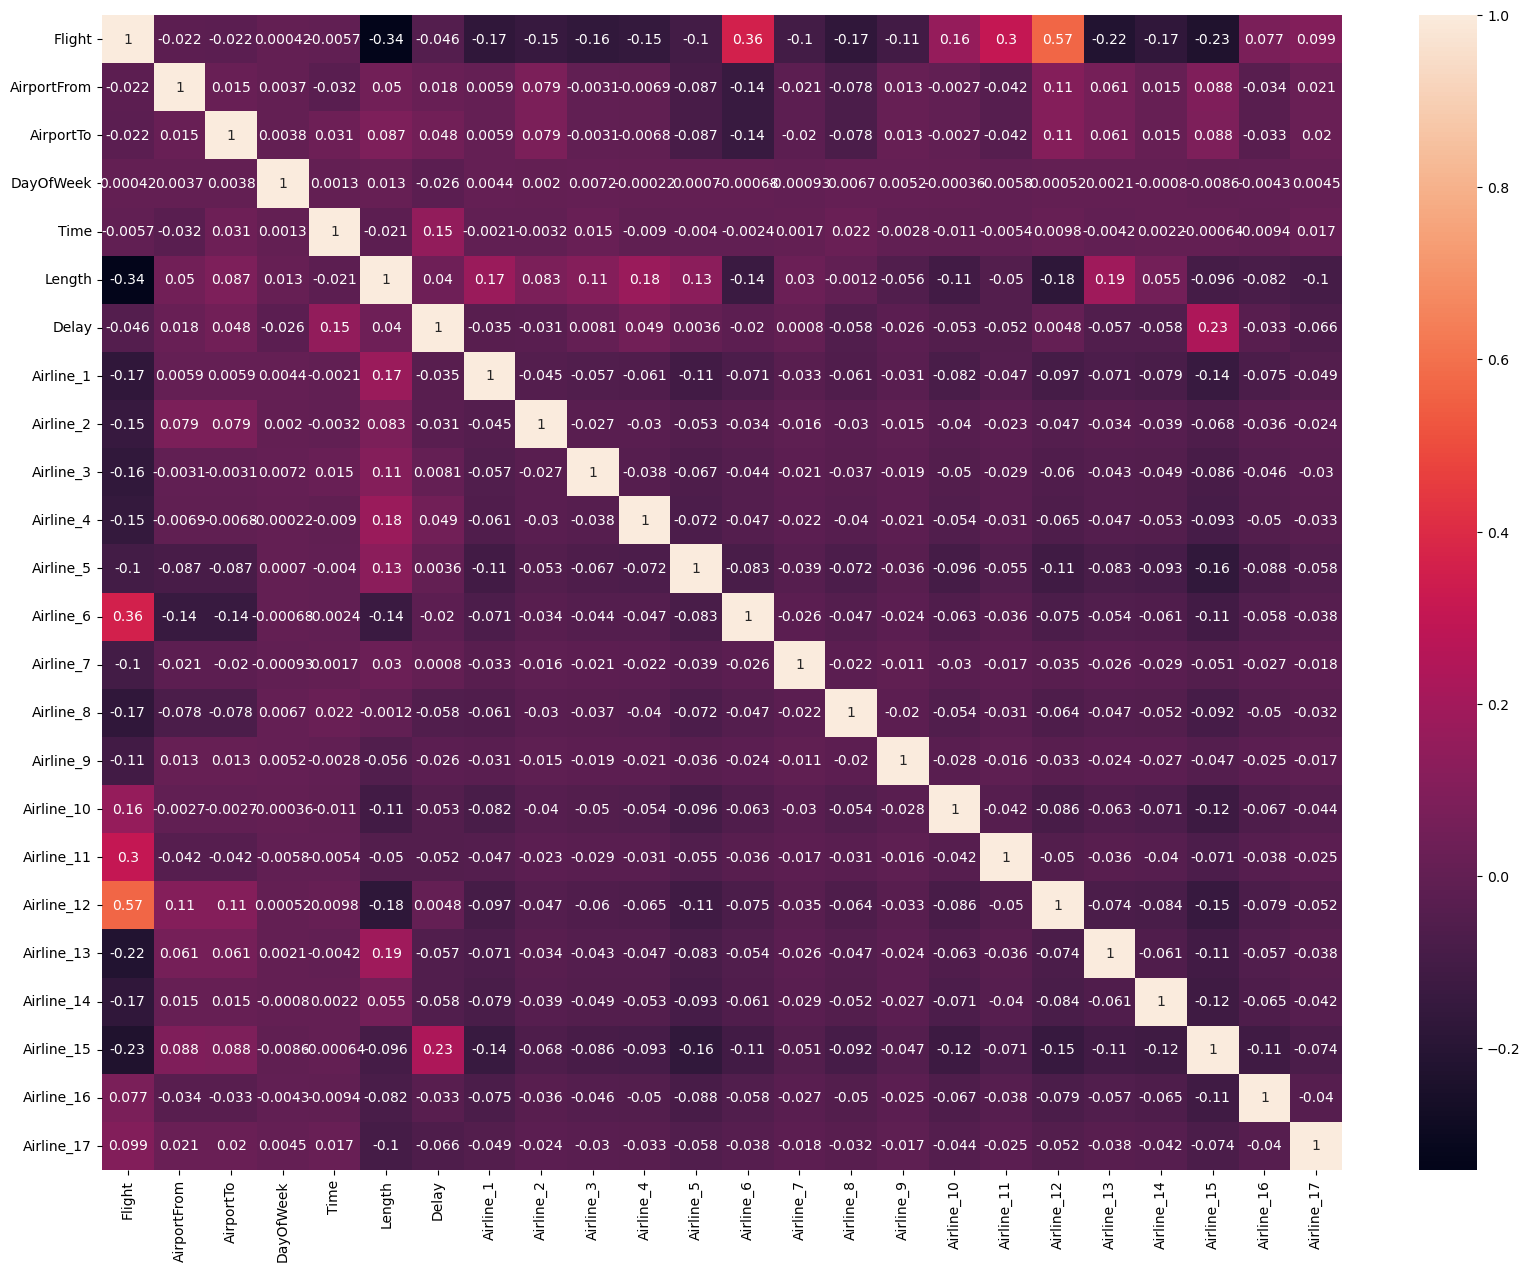

In [30]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [31]:
y= df.Delay

In [32]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Delay, dtype: int64

In [33]:
X= df.drop('Delay',axis=1)

In [34]:
X.columns

Index(['Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length',
       'Airline_1', 'Airline_2', 'Airline_3', 'Airline_4', 'Airline_5',
       'Airline_6', 'Airline_7', 'Airline_8', 'Airline_9', 'Airline_10',
       'Airline_11', 'Airline_12', 'Airline_13', 'Airline_14', 'Airline_15',
       'Airline_16', 'Airline_17'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=316)

In [36]:
y_train

335967    1
470669    0
192898    1
433033    0
181758    1
         ..
430788    0
263064    1
271968    1
441943    1
17213     0
Name: Delay, Length: 404537, dtype: int64

In [37]:
y_train.shape

(404537,)

In [38]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression(solver='liblinear',multi_class='auto')

In [39]:
lg.fit(X_train,y_train)
lg.score(X_train,y_train)

0.6321696161290562

In [40]:
lg.score(X_test,y_test)

0.6312756774394495

In [41]:
from sklearn.metrics import confusion_matrix

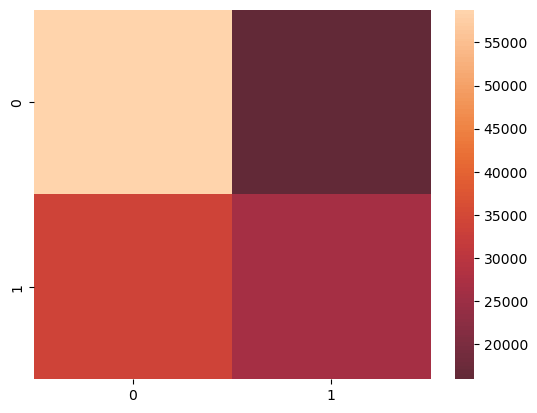

Confusion Matrix is
 [[58795 15944]
 [33777 26330]]


In [43]:
y_predLG= lg.predict(X_test)
CM_LG= confusion_matrix(y_test,y_predLG)
sns.heatmap(CM_LG,center=True)
plt.show()
print('Confusion Matrix is\n', CM_LG)

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='entropy',max_depth=16,random_state=40)

In [45]:
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)

0.6891384471630531

In [46]:
dtc.score(X_test,y_test)

0.6494445515625231

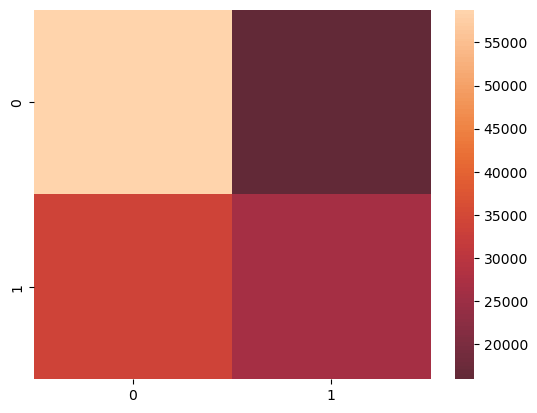

Confusion Matrix is
 [[58795 15944]
 [33777 26330]]


In [47]:
y_predDT= dtc.predict(X_test)
CM_DT= confusion_matrix(y_test,y_predLG)
sns.heatmap(CM_DT,center=True)
plt.show()
print('Confusion Matrix is\n', CM_DT)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(criterion = 'entropy', max_depth=18, n_estimators=400, random_state=44)

In [49]:
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.729918400541854

In [50]:
rf.score(X_test,y_test)

0.6625632202660813

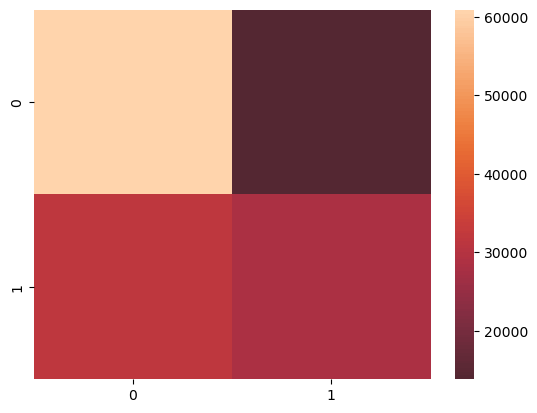

Confusion Matrix is
 [[60904 13835]
 [31667 28440]]


In [51]:
y_predRF= rf.predict(X_test)
CM_RF= confusion_matrix(y_test,y_predRF)
sns.heatmap(CM_RF,center=True)
plt.show()
print('Confusion Matrix is\n', CM_RF)

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(n_estimators=300, max_depth=8, learning_rate=0.25, random_state=30)


In [53]:
gb.fit(X_train,y_train)
gb.score(X_train,y_train)

0.7407233454541859

In [54]:
gb.score(X_test,y_test)

0.6665752043071356

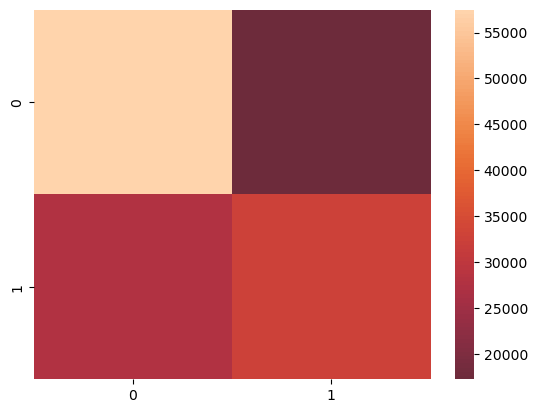

Confusion Matrix is
 [[57490 17249]
 [27712 32395]]


In [55]:
y_predGB= gb.predict(X_test)
CM_GB= confusion_matrix(y_test,y_predGB)
sns.heatmap(CM_GB,center=True)
plt.show()
print('Confusion Matrix is\n', CM_GB)

In [56]:
from sklearn.ensemble import VotingClassifier
vc= VotingClassifier(estimators=[('lg',lg),('dtc',dtc),('rf',rf),('gb',gb)],voting='hard')

In [57]:
vc.fit(X_train,y_train)
vc.score(X_train,y_train)

0.7047810212662872

In [58]:
vc.score(X_test,y_test)

0.6610058881983892

VotingClassifierModel = VotingClassifier(estimators=[('GBCModel',GBCModel),('RFCModel',RandomForestClassifierModel),
                                                     ('TDCModel',DecisionTreeClassifierModel)],
                                         voting='hard')

In [ ]:
##HyperParameterTuning models for better accuracy

In [ ]:
##RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators= [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features= ['auto','log2']
max_depth=[int(x) for x in np.linspace(10, 1000,10)]
min_samples_split= [1,2,5,10,14]
min_samples_leaf= [1,2,4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

In [ ]:
rf_randomcv= RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [ ]:
##GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

In [ ]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_


In [ ]:
best_grid

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [ ]:
#Multilayer Neural Network

In [59]:
from sklearn.neural_network import MLPClassifier
MLP= MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=100)

In [60]:
MLP.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=100)

In [61]:
MLP.score(X_train,y_train)

0.6369578060844867

In [62]:
MLP.score(X_test,y_test)

0.6363629621939101